In [1]:
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'DATASET'

In [3]:
X= list()
y=list()

In [4]:
x=os.listdir(path)
x.remove('.DS_Store')

In [5]:
for i in x:
    for j in os.listdir(os.path.join(path,i)):
        img_array = cv2.imread(os.path.join(path,i,j) ,cv2.IMREAD_GRAYSCALE) 
        new_array = cv2.resize(img_array, (100, 100)) 
        X.append(new_array)
        y.append(i)
        

In [6]:
def change(x):
    if x == 'bee1' or x=='bee2':
        return 0
    elif x == 'wasp1' or x=='wasp2':
        return 1
    elif x == 'other_noinsect':
        return 2
    else:
        return 3

In [7]:
y = list(map(change,y))

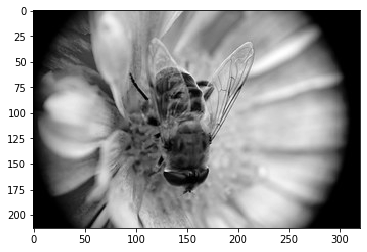

In [8]:
img_array = cv2.imread('DATASET/bee1/10007154554_026417cfd0_n.jpg' ,cv2.IMREAD_GRAYSCALE) 
plt.imshow(img_array, cmap='gray')
plt.show()

In [9]:
X = np.array(X)
y = np.array(y)

In [10]:
X.shape

(11421, 100, 100)

In [11]:
y.shape

(11421,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [13]:
print('X train shape: ',X_train.shape)
print('X test shape: ',X_test.shape)
print('y train shape: ',y_train.shape)
print('y test shape: ',y_test.shape)

X train shape:  (8565, 100, 100)
X test shape:  (2856, 100, 100)
y train shape:  (8565,)
y test shape:  (2856,)


In [14]:
X_train = X_train.reshape(X_train.shape[0], 100, 100, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 100, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import regularizers

Using TensorFlow backend.


In [17]:
from keras.utils import np_utils
n_classes = 4
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

In [18]:
model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,1), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="valid", activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
8565/8565 [==============================] - 803s 94ms/step - loss: 1.2950 - accuracy: 0.4182
Epoch 2/10
8565/8565 [==============================] - 1078s 126ms/step - loss: 1.1148 - accuracy: 0.4870
Epoch 3/10
8565/8565 [==============================] - 841s 98ms/step - loss: 1.0391 - accuracy: 0.5392
Epoch 4/10
8565/8565 [==============================] - 706s 82ms/step - loss: 0.9638 - accuracy: 0.5691
Epoch 5/10
8565/8565 [==============================] - 642s 75ms/step - loss: 0.8973 - accuracy: 0.6148
Epoch 6/10
8565/8565 [==============================] - 626s 73ms/step - loss: 0.8452 - accuracy: 0.6383
Epoch 7/10
8565/8565 [==============================] - 631s 74ms/step - loss: 0.7834 - accuracy: 0.6731
Epoch 8/10
8565/8565 [==============================] - 745s 87ms/step - loss: 0.7163 - accuracy: 0.7022
Epoch 9/10
8565/8565 [==============================] - 311s 36ms/step - loss: 0.6456 - accuracy: 0.7370
Epoch 10/10
8565/8565 [==============================

In [20]:
accuracy = model.evaluate(x=X_test,y=y_test)
print("Accuracy: ",accuracy[1])

2856/2856 [==============================] - 19s 7ms/step
Accuracy:  0.6610644459724426


In [21]:
img = cv2.imread('fly.png' ,cv2.IMREAD_GRAYSCALE) 
test_img = cv2.resize(img,(100,100))
test_img = test_img.reshape(1,100, 100, 1)
img_class = model.predict_classes(test_img)
prediction = img_class[0]
classname = img_class[0]
print("Class: ",classname)

Class:  3
